In [1]:
#Basic Imports
import pandas as pd
import numpy as np
import matplotlib as plt
import statsmodels.api as sm
import seaborn as sns
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize)

In [4]:
#Classifying Imports
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [14]:
Smarket = load_data("Smarket")
Smarket.head()
numerical_data = Smarket.drop(columns = "Direction")

<Axes: >

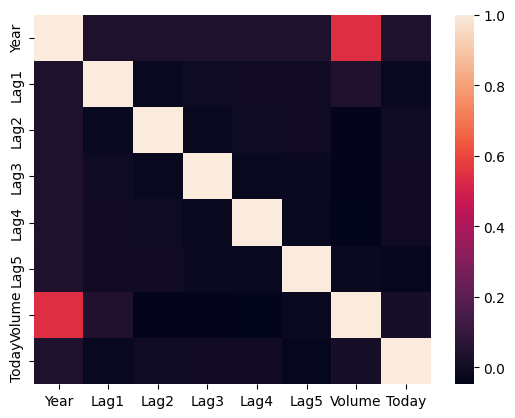

In [15]:
sns.heatmap(numerical_data.corr())

<Axes: >

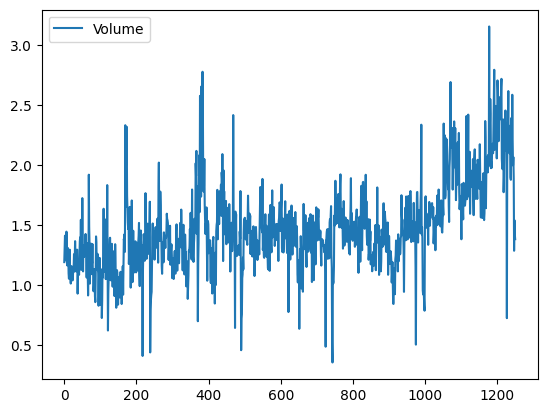

In [17]:
Smarket.plot(y="Volume")

In [19]:
allvars = Smarket.columns.drop(['Today',"Direction","Year"])
design = MS(allvars)
X = design.fit_transform(Smarket)
Y = Smarket.Direction == "Up"
glm = sm.GLM(Y,X,family = sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-0.1260,0.241,-0.523,0.601
Lag1,-0.0731,0.050,-1.457,0.145
Lag2,-0.0423,0.050,-0.845,0.398
Lag3,0.0111,0.050,0.222,0.824
Lag4,0.0094,0.050,0.187,0.851
Lag5,0.0103,0.050,0.208,0.835
Volume,0.1354,0.158,0.855,0.392
